In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import square
import scipy
from scipy import signal
from scipy.io import wavfile


%matplotlib inline

In [9]:
def get_time(time_in_sec, sample_rate):
    n = int(sample_rate * time_in_sec)
    return np.linspace(0, time_in_sec, n, endpoint=False)

def get_transformed_sig(sig, sample_rate):
    tr = fft(sig)
    amplitudes_sig_discrete = abs(tr)
    # TODO why do we Norm?
    amplitudes_sig_discrete /= len(sig)
    # because of getting symetric
    amplitudes_sig_discrete *= 2
    # As we want to get only one side (half of the spectre)
    return amplitudes_sig_discrete, np.angle(tr)

def plot_signal(sig, time_seq):
    plt.plot(time_seq, sig, color='red')
    plt.xlabel('Time, sec')
    plt.ylabel('Amplitude, val')
    plt.show()

def plot_amplitude_spectre(amplitudes_sig_discrete, sample_rate, up_hz=None, down_hz=None):
    up = 0
    down = sample_rate/2
    time_len = len(amplitudes_sig_discrete) / sample_rate
    
    if up_hz is not None:
        up = up_hz
    if down_hz is not None:
        down = down_hz
    
    start, end = int(up * time_len), int(down * time_len)
    freqs = np.linspace(up, down, end-start)
    plt.stem(freqs, amplitudes_sig_discrete[start:end])
    plt.xlabel('Freq, Hz')
    plt.ylabel('Amplitude, val')
    plt.show()

Task 1

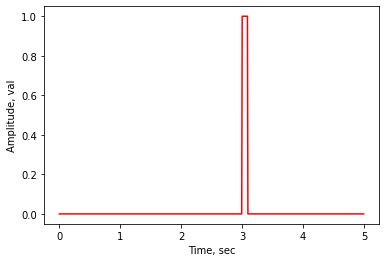

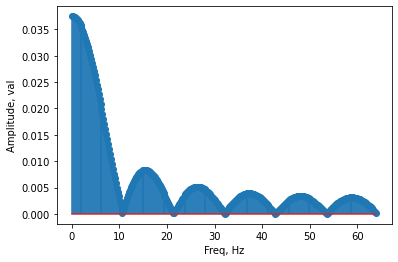

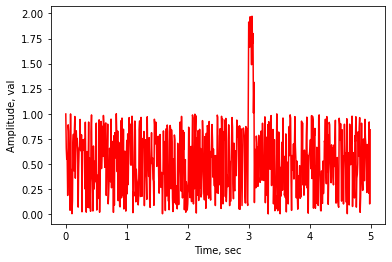

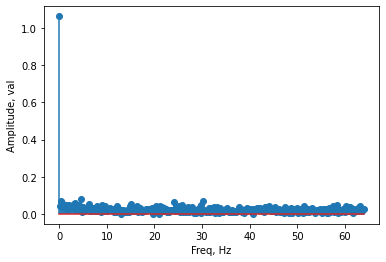

In [51]:
t = 5
sr = 128
imp_N = int(0.1 * sr)
A = 1

time = get_time(t, sr)
start_idx = int(3 * sr)
sig = np.concatenate((np.zeros(start_idx), [A]*imp_N, np.zeros(len(time) - imp_N - start_idx)))
noise = s = np.random.uniform(0, 1, len(time))

plot_signal(sig, time)
plot_amplitude_spectre(get_transformed_sig(sig, sr)[0], sr)
res = sig + noise
plot_signal(res, time)
plot_amplitude_spectre(get_transformed_sig(res, sr)[0], sr)


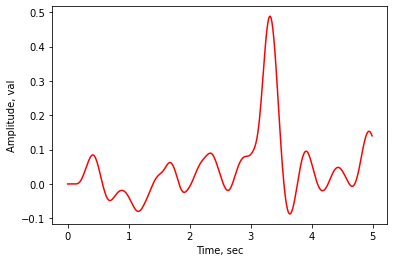

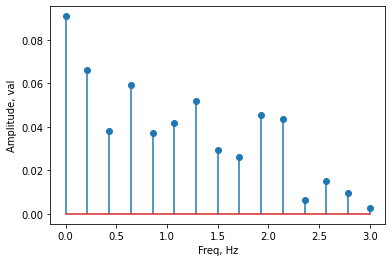

In [50]:
b, a = signal.butter(N=5, Wn=2, btype='lowpass', fs=sr)
y = signal.lfilter(b, a, res)
plot_signal(y, time)
plot_amplitude_spectre(get_transformed_sig(y, sr)[0], sr, 0, 3)


Task 2

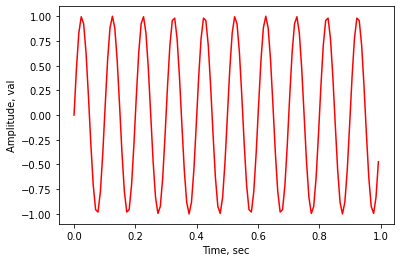

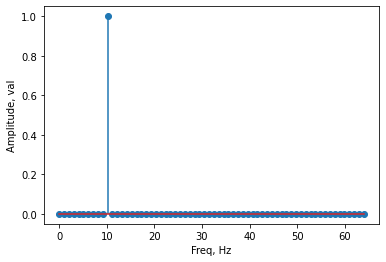

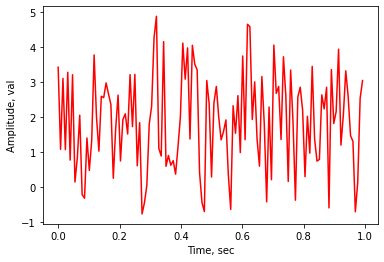

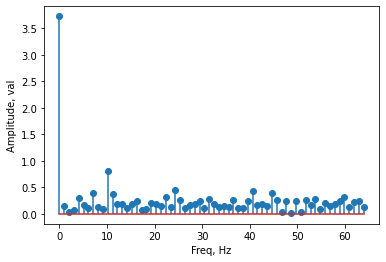

In [48]:
t = 1
sr = 128
A = 1
time = get_time(t, sr)
sig = A * np.sin(2 * np.pi * 10 * time)
noise = s = np.random.uniform(0, 4, len(time))

plot_signal(sig, time)
plot_amplitude_spectre(get_transformed_sig(sig, sr)[0], sr)
res = sig + noise
plot_signal(res, time)
plot_amplitude_spectre(get_transformed_sig(res, sr)[0], sr)


lowpass filter applied for F_start=11


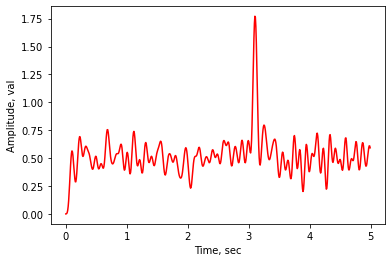

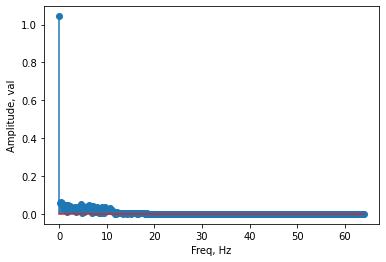

In [70]:
print("lowpass filter applied for F_start=11")
b, a = signal.cheby1(N=5, rp=3, Wn=11, btype='lowpass', fs=sr)
y = signal.lfilter(b, a, res)
plot_signal(y, time)
plot_amplitude_spectre(get_transformed_sig(y, sr)[0], sr)


highpass filter applied for F_start=11


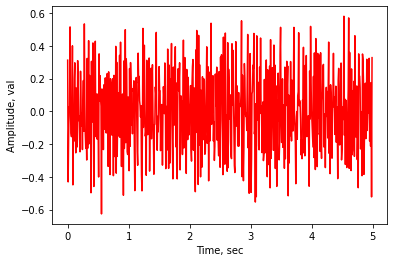

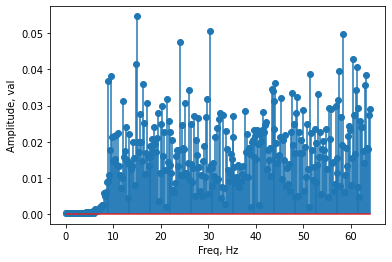

In [71]:
print("highpass filter applied for F_start=11")
b, a = signal.cheby1(N=5, rp=3, Wn=9, btype='highpass', fs=sr)
y = signal.lfilter(b, a, res)
plot_signal(y, time)
plot_amplitude_spectre(get_transformed_sig(y, sr)[0], sr)


Bandpass filter applied for [7, 13]


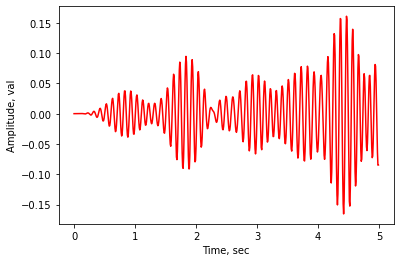

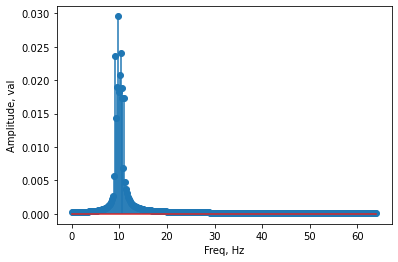

In [76]:
print("Bandpass filter applied for [7, 13]")
b, a = signal.cheby1(N=5, rp=3, Wn=[9, 11], btype='bandpass', fs=sr)
y = signal.lfilter(b, a, res)
plot_signal(y, time)
plot_amplitude_spectre(get_transformed_sig(y, sr)[0], sr)


Task 3

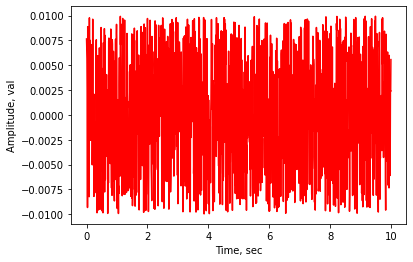

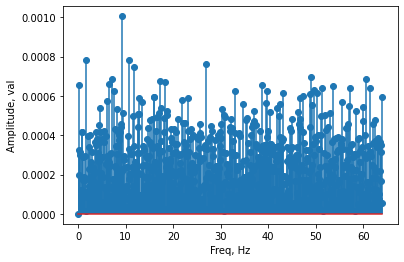

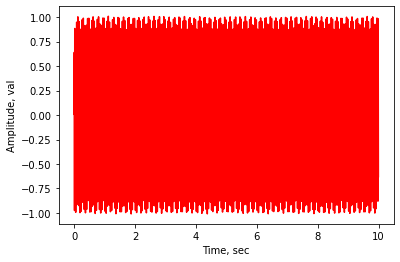

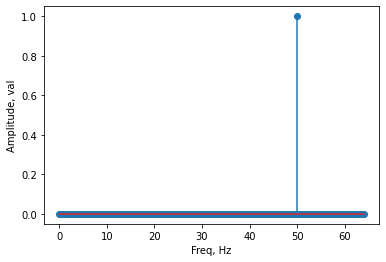

In [100]:
t = 10
sr = 128
A = 10e-3
time = get_time(t, sr)

sig = A * np.random.uniform(-1, 1, len(time))
noise = 1 * np.sin(2 * np.pi * 50 * time)

plot_signal(sig, time)
plot_amplitude_spectre(get_transformed_sig(sig, sr)[0], sr)
res = sig + noise
plot_signal(res, time)
plot_amplitude_spectre(get_transformed_sig(res, sr)[0], sr)


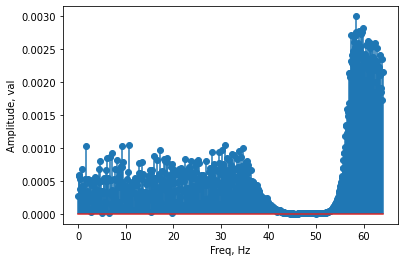

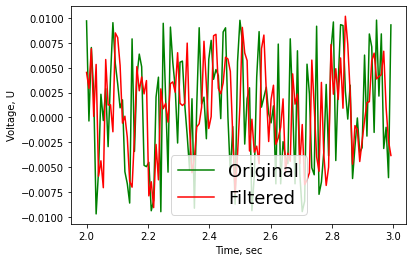

In [101]:
b, a = signal.butter(N=5, Wn=[35, 57], btype='bandstop', fs=sr)
y = signal.lfilter(b, a, res)

plot_amplitude_spectre(get_transformed_sig(y, sr)[0], sr)

start, end = 128 * 2, 128 * 3
time = time[start:end]
sig = sig[start:end]
y = y[start:end]
plt.plot(time, sig, color='green')
plt.plot(time, y, color='red')
plt.legend(['Original','Filtered'], fontsize=18)
plt.xlabel('Time, sec')
plt.ylabel('Voltage, U')
plt.show()

Task 4

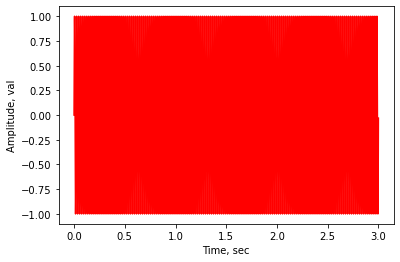

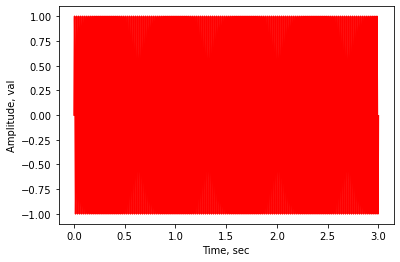

In [131]:
t = 3
sf8 = 10e3
sf4 = 44100
time8 = get_time(t, sf8)
sig8 = np.sin(2 * np.pi * 50 * time8)
plot_signal(sig8, time8)

time4 = get_time(t, sf4)
sig4 = np.sin(2 * np.pi * 50 * time4)
plot_signal(sig4, time4)


In [136]:
# Or using the sound
sf8, sig8_ = wavfile.read('./media/10000.wav')
sf4, sig4_ = wavfile.read('./media/44100.wav')
sig8 = np.array([el[1] for el in sig8_])
sig4 = np.array([el[1] for el in sig4_])

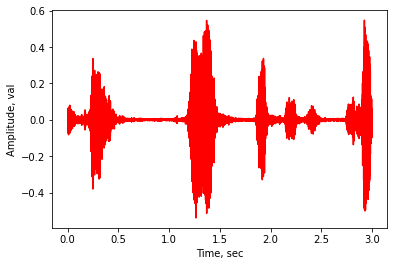

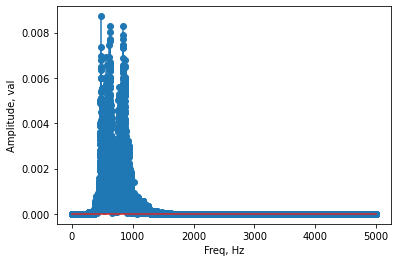

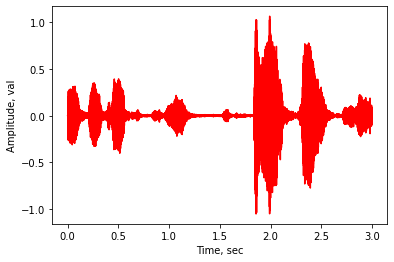

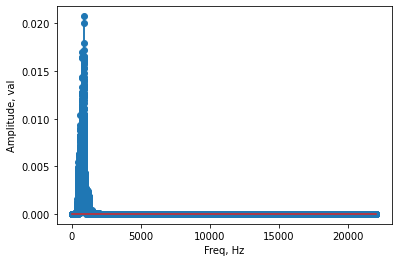

In [140]:
b, a = signal.butter(N=5, Wn=[450, 1e3], btype='bandpass', fs=sf8)
y8 = signal.lfilter(b, a, sig8)
plot_signal(y8, time8)
plot_amplitude_spectre(get_transformed_sig(y8, sf8)[0], sf8)

b, a = signal.butter(N=5, Wn=[450, 1e3], btype='bandpass', fs=sf4)
y4 = signal.lfilter(b, a, sig4)
plot_signal(y4, time4)
plot_amplitude_spectre(get_transformed_sig(y4, sf4)[0], sf4)

wavfile.write('./media/450-1000-44100.wav', sf4, y4)
wavfile.write('./media/450-1000-10000.wav', sf8, y8)



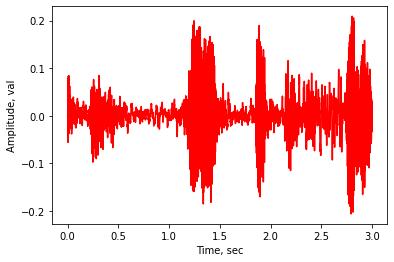

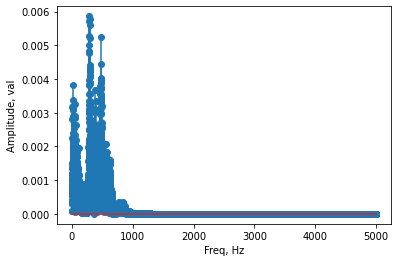

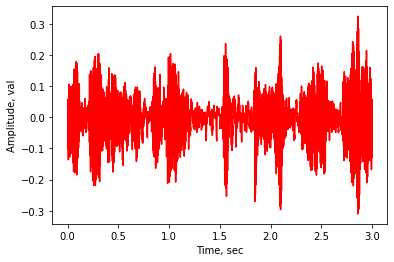

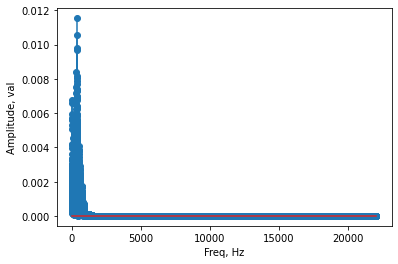

In [141]:
b, a = signal.butter(N=5, Wn=450, btype='lowpass', fs=sf8)
y8 = signal.lfilter(b, a, sig8)
plot_signal(y8, time8)
plot_amplitude_spectre(get_transformed_sig(y8, sf8)[0], sf8)

b, a = signal.butter(N=5, Wn=450, btype='lowpass', fs=sf4)
y4 = signal.lfilter(b, a, sig4)
plot_signal(y4, time4)
plot_amplitude_spectre(get_transformed_sig(y4, sf4)[0], sf4)

wavfile.write('./media/450-low-10000.wav', sf8, y8)
wavfile.write('./media/450-low-44100.wav', sf4, y4)



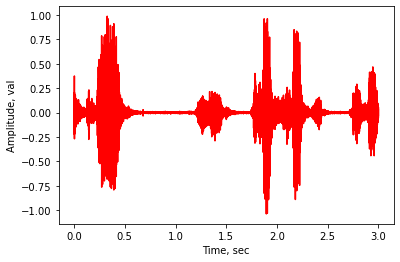

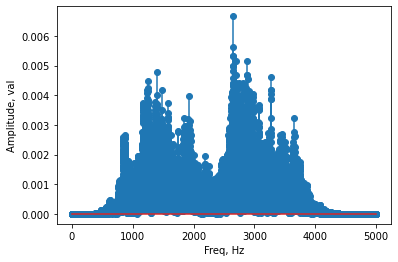

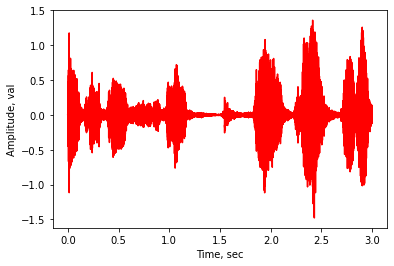

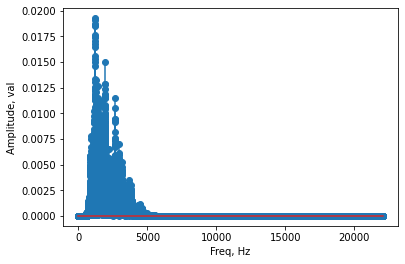

In [142]:
b, a = signal.butter(N=5, Wn=[1e3, 4e3], btype='bandpass', fs=sf8)
y8 = signal.lfilter(b, a, sig8)
plot_signal(y8, time8)
plot_amplitude_spectre(get_transformed_sig(y8, sf8)[0], sf8)

b, a = signal.butter(N=5, Wn=[1e3, 4e3], btype='bandpass', fs=sf4)
y4 = signal.lfilter(b, a, sig4)
plot_signal(y4, time4)
plot_amplitude_spectre(get_transformed_sig(y4, sf4)[0], sf4)

wavfile.write('./media/1000-4000-10000.wav', sf8, y8)
wavfile.write('./media/1000-4000-44100.wav', sf4, y4)
